<a href="https://colab.research.google.com/github/jegazhu/Python-Microservices-Web-App/blob/main/code_02_XX_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 02_02 Preparing Data for Sentiment Analysis

In [4]:
#Import the movie reviews corpus
with open("Review-Descriptions.txt", 'r') as fh:  
    reviews = fh.readlines()
print(reviews[:2])

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.\n', 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".\n']


## 02_03 Finding Sentiments by Review

In [6]:
#install textblob if not already installed using "pip install -U textblob"
from textblob import TextBlob

print('{:40} : {:10} : {:10}'.format("Review", "Polarity", "Subjectivity") )

for review in reviews:
    #Find sentiment of a review
    sentiment = TextBlob(review)
    #Print individual sentiments
    print('{:40} :   {: 01.2f}    :   {:01.2f}'.format(review[:40]\
                , sentiment.polarity, sentiment.subjectivity) )


Streaming output truncated to the last 5000 lines.
I just bought these for my daughter toda :    0.05    :   0.71
The Barbara's snackimals are an unexpect :    0.24    :   0.45
We've tried the vanilla and now regularl :    0.40    :   0.47
My kids really enjoyed these animal crac :    0.32    :   0.52
Our whole family (daddy, mommy, and 16 m :    0.51    :   0.53
We love these little cookies!  They have :    0.42    :   0.59
I ordered these based on the reviews. I' :    0.43    :   0.80
My 3 year-old daughter and I need to avo :    0.14    :   0.53
I love this snack. We still have a lot l :    0.03    :   0.47
Ordered these on sale and they are aweso :    0.56    :   0.76
I would say these are some of the better :    0.39    :   0.52
These cookies are so addictive.  I start :    0.20    :   0.81
These have a very mild peanut butter fla :    0.64    :   0.72
I really like the taste of these little  :    0.18    :   0.32
Being a natural, somewhat healthy cookie :    0.21    :   0.59
Wow!

## 02_04 Summarizing Sentiment

Final summarized counts : [74563, 114307, 25868]

 Pie Representation 
-------------------


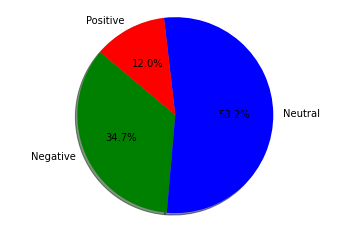

In [7]:

#Categorize Polarity into Positive, Neutral or Negative
labels = ["Negative", "Neutral", "Positive"]
#Initialize count array
values =[0,0,0]

#Categorize each review
for review in reviews:
    sentiment = TextBlob(review)
    
    #Custom formula to convert polarity 
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1
    
print("Final summarized counts :", values)

import matplotlib.pyplot as plt
#Set colors by label
colors=["Green","Blue","Red"]

print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()